In [19]:
import numpy as np
import pandas as pd
import scipy.io.wavfile
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
filename = "dataset/conversation.wav"
data = scipy.io.wavfile.read(filename)
print( data)

(44100, array([ -43,  -54,  -57, ..., -191, -117,  -20], dtype=int16))


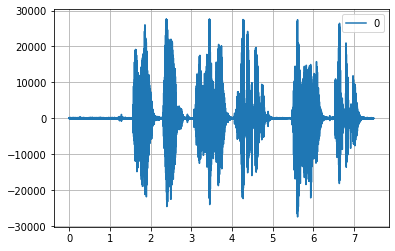

In [21]:
sampling_rate = data[0]

duration = len(data[1])/float(sampling_rate)
t = np.arange(0, duration, 1/float(sampling_rate))

df = pd.DataFrame(data[1], index=t)

df.plot(grid=True)
plt.show()

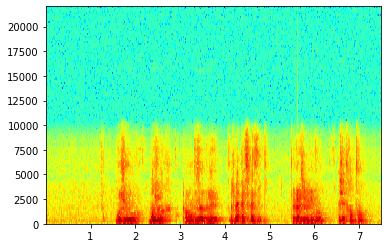

In [22]:
sp, f, t, im=plt.specgram( data[1], Fs=sampling_rate, cmap='jet');

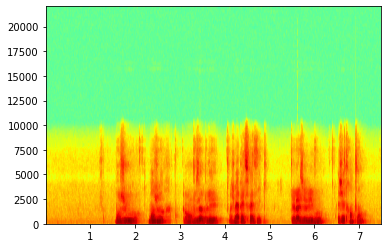

In [23]:
sp_df = pd.DataFrame(10*np.log10(sp.T), index=t, columns=f)

plt.contourf( sp_df.index, sp_df.columns, sp_df.T, 256, cmap=plt.jet(), vmin=-150, vmax=60)
#sp_df

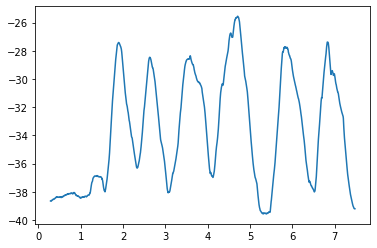

In [24]:
sp_df_mean = sp_df.mean(axis=1).rolling(100).mean()
sp_df_mean.plot()

In [25]:
sp_df_mean.mean(), sp_df_mean.std()

(-33.60485948379491, 4.009855357001593)

-32.802888412394594

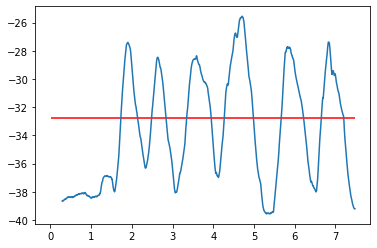

In [26]:
ax = sp_df_mean.plot()
son_th = sp_df_mean.mean() +0.2*sp_df_mean.std()
ax.hlines( son_th, sp_df_mean.index[0], sp_df_mean.index[-1], 'r')
son_th

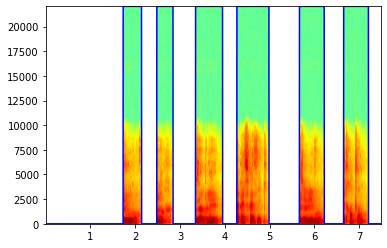

In [27]:
son_idx = (sp_df_mean>son_th)

son_sp_df = sp_df.copy(True)
son_sp_df[son_idx==False] = np.nan

ax = plt.subplot(111)
ax.contourf( son_sp_df.index, son_sp_df.columns, son_sp_df.T, 256, cmap=plt.jet(), vmin=-150, vmax=60)

(son_idx*son_sp_df.columns[-1]).plot( ax=ax, c='b')

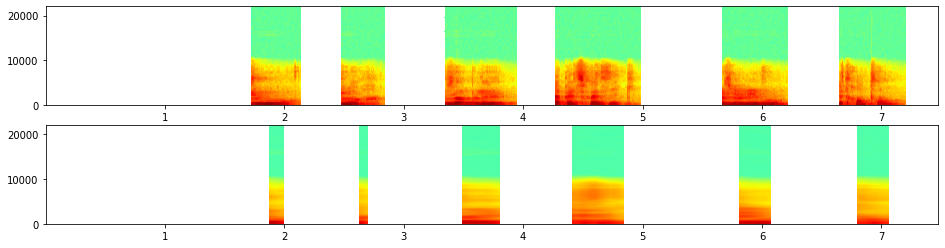

In [28]:
plt.figure(figsize=(16,4))
plt.subplot(211)
plt.contourf( son_sp_df.index, son_sp_df.columns, son_sp_df.T, 256, cmap=plt.jet(), vmin=-150, vmax=60)
plt.subplot(212)
plt.contourf( son_sp_df.index, son_sp_df.columns, son_sp_df.rolling(100,center=True).mean().T, 256, cmap=plt.jet(), vmin=-150, vmax=60)

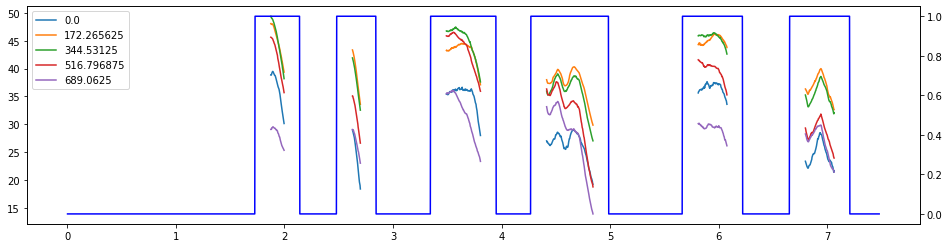

In [29]:
id_sp=son_sp_df.rolling(100,center=True).mean()

plt.figure(figsize=(16,4))
ax=plt.subplot(111)
ax=id_sp[id_sp.columns[0:5]].plot(ax=ax,legend=False)
plt.legend(loc='upper left')
(son_idx*1).plot( ax=ax, c='b', secondary_y=True)

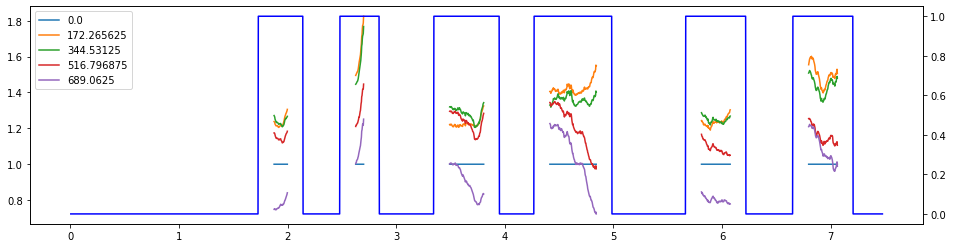

In [30]:
plt.figure(figsize=(16,4))
ax = plt.subplot(111)
ax = id_sp[id_sp.columns[0:5]].divide( id_sp[id_sp.columns[0]], axis=0).plot(ax=ax,legend=False)
plt.legend(loc='upper left')
(son_idx*1).plot( ax=ax, c='b', secondary_y=True)

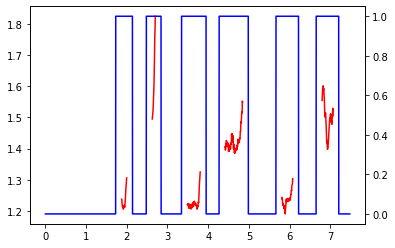

In [31]:
plt.figure()
ax = plt.subplot(111)
(son_idx*1).plot( ax=ax, c='b', secondary_y=True)
(id_sp[id_sp.columns[1]]/id_sp[id_sp.columns[0]]).plot(ax=ax, c='r')

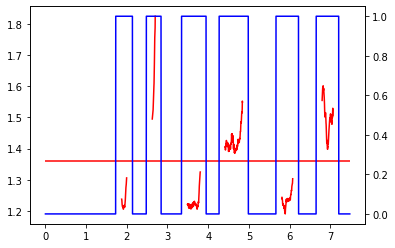

In [32]:
id_th = 1.36

plt.figure()
ax = plt.subplot(111)
(son_idx*1).plot( ax=ax, c='b', secondary_y=True)
(id_sp[id_sp.columns[1]]/id_sp[id_sp.columns[0]]).plot(ax=ax, c='r')
ax.hlines( id_th, id_sp.index[0], id_sp.index[-1], 'r')

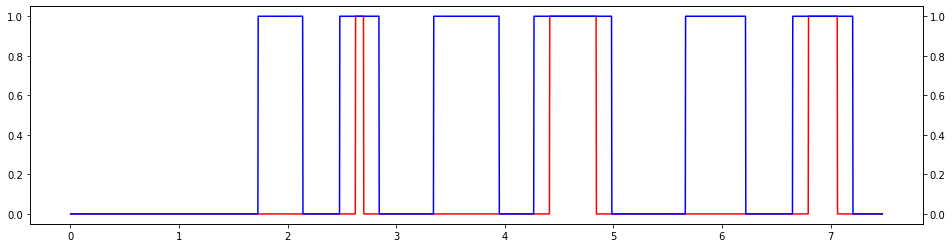

In [33]:
id_idx = (id_sp[id_sp.columns[1]]/id_sp[id_sp.columns[0]]) > id_th

plt.figure(figsize=(16,4))
ax = plt.subplot(111)
(id_idx*1).plot(ax=ax, c='r')
(son_idx*1).plot( ax=ax, c='b', secondary_y=True)

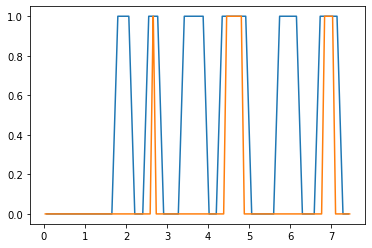

In [34]:
w = 50
(son_idx*1).rolling(int(w),center=True).mean().plot()
(id_idx*1).rolling(int(w/2),center=True).mean().plot()